# Кодирование алгоритма логистической регрессии

## Serrano

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import utils

In [2]:
features = np.array([[1,0], [0,2], [1,1], [1,2], [1,3], [2,2], [3,2], [2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

In [3]:
# features = np.array([[1,0,1], [0,2,1], [1,1,0], [1,2,3], [1,3,2], [2,2,2], [2,3,1], [3,2,3]])
# labels = np.array([0,0,0,0,1,1,1,1])

In [4]:
len(features)

8

In [5]:
# сигмоидная функция
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

In [6]:
# функция оценки
def score(weights, bias, features):
    """
    Функция оценки
    Параметры: weights - веса, bias - смещение, features - признаки
    """
    return np.dot(weights, features) + bias

In [7]:
# прогноз
def prediction(weights, bias, features):
    """
    Функция прогноза - это сигмоидная функция активации, применяемая к оценке.
    Параметры: weights - веса, bias - смещение, features - признаки
    """
    return sigmoid(score(weights, bias, features))

Переходим к logloss -функции

In [8]:
# логарифмическая потеря для одной записи
def log_loss(weights, bias, features, label):
    pred = 1.0*prediction(weights, bias, features)
    return -label * np.log(pred) - (1 - label) * np.log(1 - pred)

In [9]:
# логарифмическая потеря по всему набору данных
def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

Кодируем алгоритм логистической регрессии

In [10]:
# функция изменения весов и смещения
def logistic_trick(weights, bias, features, label, learning_rate=0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label - pred) * features[i] * learning_rate
        bias += (label - pred) * learning_rate
    return weights, bias

In [11]:
# Функция алгоритма логистической регрессии
def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):
    # utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features) - 1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    # utils.draw_line(weights[0], weights[1], bias)
    # plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    print(errors[-1])
    return weights, bias
        
        

Запускаем алгоримт логистической регрессии

2.641123374558737


([1.089626975418816, 0.7356997089603051], -2.351993349017207)

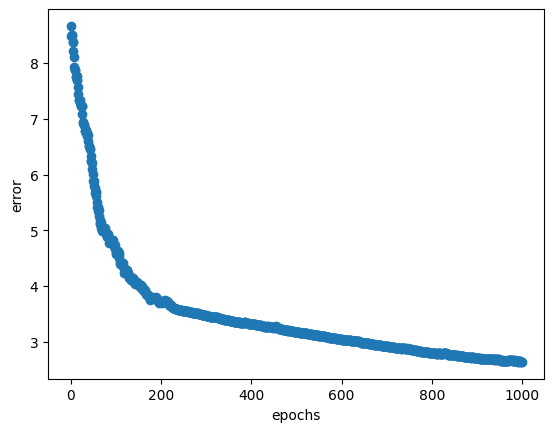

In [12]:
logistic_regression_algorithm(features, labels)

## Юлия Пономарева

In [13]:
X = np.array([[1,0], [0,2], [1,1], [1,2], [1,3], [2,2], [3,2], [2,3]])
y = np.array([0,0,0,0,1,1,1,1])

In [14]:
# X = np.array([[1,0,1], [0,2,1], [1,1,0], [1,2,3], [1,3,2], [2,2,2], [2,3,1], [3,2,3]])
# y = np.array([0,0,0,0,1,1,1,1])

In [15]:
X = np.c_[np.ones((len(X),1)), X]

In [16]:
X

array([[1., 1., 0.],
       [1., 0., 2.],
       [1., 1., 1.],
       [1., 1., 2.],
       [1., 1., 3.],
       [1., 2., 2.],
       [1., 3., 2.],
       [1., 2., 3.]])

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = - (logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [25]:
# Установка минимального значения, на которое должны изменяться веса:
eps = 0.0001

# Первоначальная точка:
np.random.seed(9)
W = np.random.randn(X.shape[1])

# Размер шага:
learning_rate = 0.001

next_W = W

# Количество итераций:
n = 250

for i in range(n):
    cur_W = next_W
    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)
    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 80 == 0:
        print(f"Итерация: {i}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print(y_class)
        print('-------------------------------------------')

Итерация: 0
Logloss 0.8228996923503255
Accuracy 0.375
[1 0 0 0 0 0 0 0]
-------------------------------------------
Итерация: 80
Logloss 0.6206200804205448
Accuracy 0.5
[1 1 1 1 1 1 1 1]
-------------------------------------------
Итерация: 160
Logloss 0.7445673498473346
Accuracy 0.5
[1 1 1 1 1 1 1 1]
-------------------------------------------
Итерация: 240
Logloss 1.0177772666502813
Accuracy 0.5
[1 1 1 1 1 1 1 1]
-------------------------------------------


## Skalearn model

In [26]:
X = np.array([[1,0], [0,2], [1,1], [1,2], [1,3], [2,2], [3,2], [2,3]])
y = np.array([0,0,0,0,1,1,1,1])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [29]:
model.coef_

array([[1.00465774, 0.93711261]])

In [30]:
model.intercept_

array([-3.159838])

In [31]:
model.score(X,y)

1.0